In [39]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [40]:
  df = pd.read_excel("/content/diabetes.xlsx")

In [41]:
x=df.drop("Outcome",axis=1)

In [42]:
y=df["Outcome"]

In [43]:
x.shape[1]

8

In [44]:
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=0.2)

In [45]:
input_layer=keras.Input(shape=[x.shape[1]])

In [46]:
hidden_layer1=Dense(10,activation="relu")

In [47]:
hidden_layer1=hidden_layer1(input_layer)

In [48]:
hidden_layer2=Dense(4,activation="relu")

In [49]:
hidden_layer2=hidden_layer2(hidden_layer1)

In [50]:
output_layer=Dense(1,activation="sigmoid")

In [51]:
output_layer=output_layer(hidden_layer2)

In [52]:
model=keras.Model(inputs=input_layer,outputs=output_layer)

In [53]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
keras_earlystop=keras.callbacks.EarlyStopping(monitor="loss",mode="min",patience=5)

In [55]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [56]:
model.fit(x_tr,y_tr,epochs=100,callbacks=[keras_earlystop])

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3551 - loss: 63.5843
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4776 - loss: 43.9063
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4951 - loss: 32.9578
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5223 - loss: 24.1275
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5589 - loss: 18.8914
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6572 - loss: 10.9817
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6252 - loss: 8.8671  
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6475 - loss: 6.8093 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6448 - loss: 4.5018 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6482 - loss: 3.0467 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5998 - loss: 3.0095 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [57]:
model.evaluate(x_tr,y_tr)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7075 - loss: 0.5912


[0.592343270778656, 0.6954397559165955]

In [58]:
p_tr=model.predict(x_tr)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [59]:
p_test=model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [60]:
p_test[0:3]

array([[0.42725393],
       [0.36180848],
       [0.19910279]], dtype=float32)

In [61]:
p_list=[]
for i in p_test:
  if i<0.5:
    p_list.append(0)
  else:
    p_list.append(1)

In [62]:
import matplotlib.pyplot as plt

In [63]:
gr=df["Outcome"].value_counts()

In [64]:
colors=["green","red"]

In [65]:
labels=["Non_Diabetic","Diabetic"]

/tmp/ipython-input-66-81362615.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


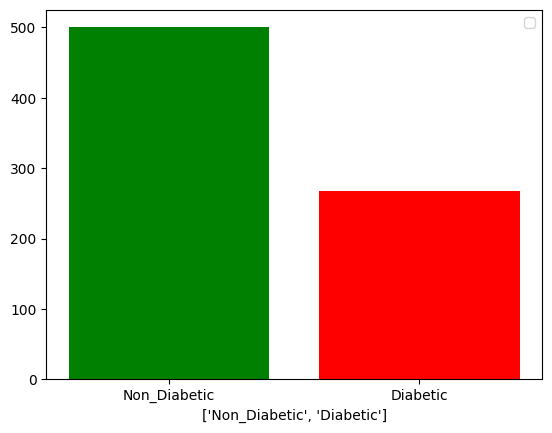

In [66]:
plt.bar(gr.index,gr.values,color=colors,tick_label=labels)
plt.xlabel(labels)
plt.legend()
plt.show()

In [67]:
from sklearn.metrics import  classification_report,accuracy_score

In [68]:
print(classification_report(y_test,p_list))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80        96
           1       0.72      0.45      0.55        58

    accuracy                           0.73       154
   macro avg       0.73      0.67      0.68       154
weighted avg       0.73      0.73      0.71       154



In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(y_test,p_list)

array([[86, 10],
       [32, 26]])